In [1]:
import torch

x = torch.tensor([5, 2])
y = torch.tensor([2, 4])

print(x*y)

tensor([10,  8])


In [2]:
x = torch.zeros([2, 5])

x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [3]:
x.shape

torch.Size([2, 5])

In [4]:
y = torch.rand([2, 5])

y

tensor([[0.7965, 0.0062, 0.0994, 0.8346, 0.4935],
        [0.8309, 0.2325, 0.0314, 0.6248, 0.4247]])

In [5]:
y.view([2, 5])

tensor([[0.7965, 0.0062, 0.0994, 0.8346, 0.4935],
        [0.8309, 0.2325, 0.0314, 0.6248, 0.4247]])

In [6]:
import torchvision
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
restset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

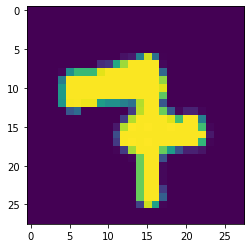

In [10]:
import matplotlib.pyplot as plt

x = data[0][0]
y = data[1][0]

plt.imshow(x.view(28, 28))
plt.show()

In [11]:
x.shape

torch.Size([1, 28, 28])

In [13]:
total = 0
counter_dict = {
    0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0
}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)        
        self.fc3 = nn.Linear(64, 64)        
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [20]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)

In [22]:
output = net(X)
output

tensor([[-2.3403, -2.1096, -2.3712, -2.3469, -2.1706, -2.4470, -2.3676, -2.2828,
         -2.2141, -2.4331]], grad_fn=<LogSoftmaxBackward>)

In [25]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
print(loss)

tensor(0.0030, grad_fn=<NllLossBackward>)


In [26]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("accuracy: ", round(correct/total, 3))

accuracy:  0.98


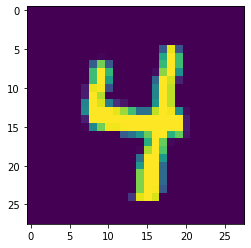

In [27]:
plt.imshow(X[4].view(28,28))
plt.show()

In [28]:
torch.argmax(net(X[3].view(-1, 28*28)))

tensor(4)